![workflow graph](Figures/SolutionNo_4_length_4.png "Workflow Graph")

In [1]:
from pathlib import Path
import sys

import pandas as pd

sys.path.append('/Users/stevep/Documents/code/APE_thesis/ape-thesis')
from wrapper_functions import *    

## Workflow Input Objects

### Table 1
- id: `housing_train`
- source: `/Users/stevep/Documents/code/APE_thesis/ape-thesis/usecases/house_prices/train.csv`
- DataClass: `MixedDataFrame`
- DataClass: `NoRelevance`    

In [3]:
housing_train = load_table_csv('/Users/stevep/Documents/code/APE_thesis/ape-thesis/usecases/house_prices/train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 1: `skew`
#### Notes
Skew of numeric column or series.
    
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['housing_train']`
	- src: `(0, 11)`
- 2
	- DataClass: `IntColumn`
	- StatisticalRelevance: `DependentVariable`
	- APE_label: `['SalePrice']`
	- src: `(0, 9)`
#### outputs:
- 1
	- DataClass: `Float`
	- StatisticalRelevance: `NoRelevance`

In [3]:
float_1_1 = skew(data=housing_train, col='SalePrice')

1.8828757597682129

### Step 2: `kurt`
#### Notes
Kurtosis of numeric column or series.
    
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['housing_train']`
	- src: `(0, 11)`
- 2
	- DataClass: `IntColumn`
	- StatisticalRelevance: `DependentVariable`
	- APE_label: `['SalePrice']`
	- src: `(0, 9)`
#### outputs:
- 1
	- DataClass: `Float`
	- StatisticalRelevance: `NoRelevance`

In [4]:
float_2_1 = kurt(data=housing_train, col='SalePrice')

6.536281860064529

### Step 3: `histplot`
#### Notes
> kwarg `hue` should be column with few features.
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['housing_train']`
	- src: `(0, 11)`
- 2
	- DataClass: `IntColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['GrLivArea']`
	- src: `(0, 5)`
- 3
	- DataClass: `IntColumn`
	- StatisticalRelevance: `DependentVariable`
	- APE_label: `['SalePrice']`
	- src: `(0, 9)`
#### outputs:
- 1
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`
- 2
	- DataClass: `Axes`
	- StatisticalRelevance: `NoRelevance`

/Users/stevep/opt/anaconda3/envs/APE/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/stevep/opt/anaconda3/envs/APE/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


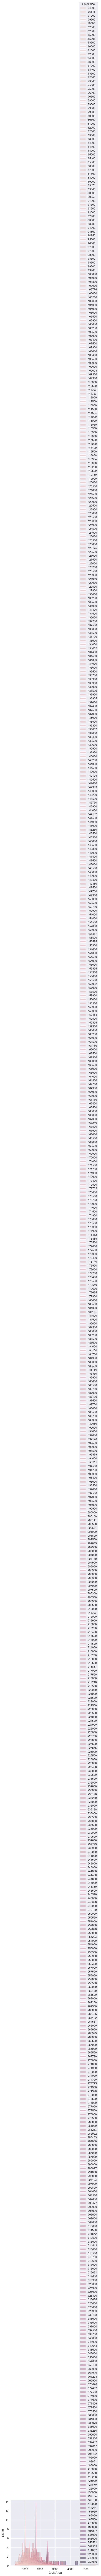

In [5]:
figure_3_1, axes_3_2 = histplot(df=housing_train, col='GrLivArea', hue='SalePrice')

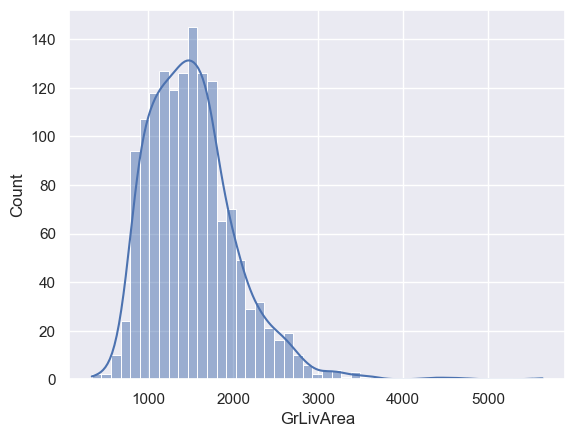

In [4]:
temp_fig, temp_ax = histplot(df=housing_train, col='GrLivArea')

### Step 4: `describe`
#### Notes
Descriptive statistics for a `Series`, `DataFrame` or `DataFrame[Column]`.

    Args:
        data (pd.DataFrame | pd.Series): Some tabular data.
        col (Optional[str], optional): Column of table. Defaults to `None`.

    Returns:
        pd.DataFrame | pd.Series: `Dataframe` if data is a `Series` or no column was given, else `Series`.
    
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['housing_train']`
	- src: `(0, 11)`
- 2
	- DataClass: `StrColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['SaleCondition']`
	- src: `(0, 10)`
#### outputs:
- 1
	- DataClass: `DescribeSeries`
	- StatisticalRelevance: `NoRelevance`

In [6]:
describeSeries_4_1 = describe(data=housing_train, col='SaleCondition')

count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object